Данная лабораторная работа ориентирована на апробацию первичного анализа данных и подготовку для дальнейшего использования в методах машинного обучения с использованием языка программирования Python:

Визуализация выбранного тестового набора: графики, гистограммы, круговые диаграммы. 
Бинаризация, исключение среднего, масштабирование, нормализация, поиск и удаление дубликатов в данных. 
Разведочный анализ данных: эмпирические распределения, выявление трендов, проверка гипотез о сезонности и независимости, определение статистических характеристик (квантили, выборочные моменты). 
Анализ и заполнение пропусков в данных. 
Выявление и обработка выбросов, в том числе с использованием диаграмм размаха (boxplot).

In [5]:
import pandas as pd
#Ссылка на датасет
#https://www.kaggle.com/competitions/titanic/data
file_path = 'train titanic.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
import numpy as np
df=df.to_numpy()
for i in range(len(df)) :
    if df[i][9]>400 :
        print(df[i])

[259 1 1 'Ward, Miss. Anna' 'female' 35.0 0 0 'PC 17755' 512.3292 nan 'C']
[680 1 1 'Cardeza, Mr. Thomas Drake Martinez' 'male' 36.0 0 1 'PC 17755'
 512.3292 'B51 B53 B55' 'C']
[738 1 1 'Lesurer, Mr. Gustave J' 'male' 35.0 0 0 'PC 17755' 512.3292
 'B101' 'C']


In [55]:
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

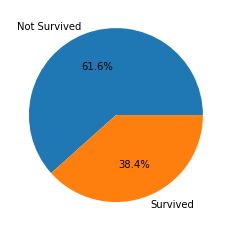

In [57]:
survival_counts = df['Survived'].value_counts()
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.show()

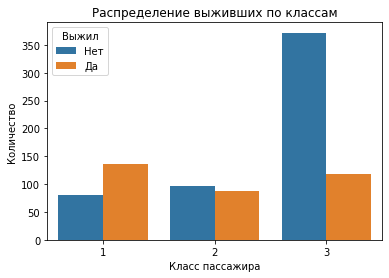

In [58]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Распределение выживших по классам")
plt.xlabel("Класс пассажира")
plt.ylabel("Количество")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.show()

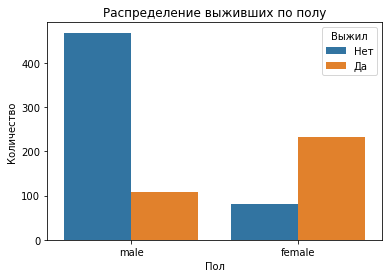

In [59]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Распределение выживших по полу")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.show()

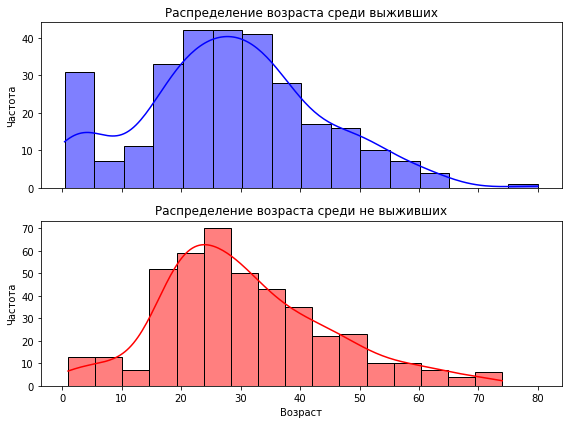

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Гистограмма для выживших
sns.histplot(data=df[df['Survived'] == 1], x='Age', kde=True, color='blue', ax=axes[0])
axes[0].set_title("Распределение возраста среди выживших")
axes[0].set_ylabel("Частота")

# Гистограмма для не выживших
sns.histplot(data=df[df['Survived'] == 0], x='Age', kde=True, color='red', ax=axes[1])
axes[1].set_title("Распределение возраста среди не выживших")
axes[1].set_xlabel("Возраст")
axes[1].set_ylabel("Частота")

plt.tight_layout()
plt.show()
#Видимо маленьких детей брали в шлюпки в первую очередь

In [61]:
duplicate_rows = df[df.duplicated()]
print("Дубликаты на основе всех столбцов:")
print(duplicate_rows)
#Нет дубликатов

Дубликаты на основе всех столбцов:
Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [62]:
#Закодируем категориальные признаки dummy-переменными, а также уберем столбцы Name, Ticket и Cabin  для дальнейшего использования датасета в моделях
categorical_columns = ['Sex', 'Pclass', 'Embarked'] 
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
print(df.head())

   Survived   Age  SibSp  Parch     Fare  Sex_male  Pclass_2  Pclass_3  \
0         0  22.0      1      0   7.2500         1         0         1   
1         1  38.0      1      0  71.2833         0         0         0   
2         1  26.0      0      0   7.9250         0         0         1   
3         1  35.0      1      0  53.1000         0         0         0   
4         0  35.0      0      0   8.0500         1         0         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


In [70]:
#Проверим наличие пропусков
missing_values = df.isnull().sum()
print("Столбцы с пропусками и количество пропусков:")
print(missing_values[missing_values > 0])

Столбцы с пропусками и количество пропусков:
Age    177
dtype: int64


In [30]:
'''
#В столбце Age есть пропуски ->заполним их случайными значениями из распределения возраста
import numpy as np

age_mean = df['Age'].mean()
age_std = df['Age'].std()
age_null_count = df['Age'].isnull().sum()
random_ages = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_null_count)
df.loc[df['Age'].isnull(), 'Age'] = random_ages


#Еще раз проверим наличие пропусков
missing_values = df.isnull().sum()
print("Столбцы с пропусками и количество пропусков:")
print(missing_values[missing_values > 0])
'''

Столбцы с пропусками и количество пропусков:
Series([], dtype: int64)


In [87]:
y=df['Survived']
X=df.drop('Survived', axis=1)
X.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,1,0,1


In [88]:
mean = np.mean(X, axis=0) 
X_centered = X - mean
std = np.std(X_centered, axis=0) 
X_normalized = X_centered/std 

In [89]:
y=df['Survived']
col_names=X_normalized.columns
X_normalized.head()


Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,-0.530377,0.432793,-0.473674,-0.502445,0.737695,-0.510152,0.902587,-0.307562,0.619306
1,0.571831,0.432793,-0.473674,0.786845,-1.355574,-0.510152,-1.107926,-0.307562,-1.614710
2,-0.254825,-0.474545,-0.473674,-0.488854,-1.355574,-0.510152,0.902587,-0.307562,0.619306
3,0.365167,0.432793,-0.473674,0.420730,-1.355574,-0.510152,-1.107926,-0.307562,0.619306
4,0.365167,-0.474545,-0.473674,-0.486337,0.737695,-0.510152,0.902587,-0.307562,0.619306


In [90]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
X_normalized=imputer.fit_transform(X_normalized)
X_normalized=pd.DataFrame(X_normalized)
X_normalized.columns=col_names

#Еще раз роверим наличие пропусков
missing_values = X_normalized.isnull().sum()
print("Столбцы с пропусками и количество пропусков:")
print(missing_values)


          Age     SibSp     Parch      Fare  Sex_male  Pclass_2  Pclass_3  \
0   -0.530377  0.432793 -0.473674 -0.502445  0.737695 -0.510152  0.902587   
1    0.571831  0.432793 -0.473674  0.786845 -1.355574 -0.510152 -1.107926   
2   -0.254825 -0.474545 -0.473674 -0.488854 -1.355574 -0.510152  0.902587   
3    0.365167  0.432793 -0.473674  0.420730 -1.355574 -0.510152 -1.107926   
4    0.365167 -0.474545 -0.473674 -0.486337  0.737695 -0.510152  0.902587   
..        ...       ...       ...       ...       ...       ...       ...   
886 -0.185937 -0.474545 -0.473674 -0.386671  0.737695  1.960202 -1.107926   
887 -0.737041 -0.474545 -0.473674 -0.044381 -1.355574 -0.510152 -1.107926   
888 -0.447711  0.432793  2.008933 -0.176263 -1.355574 -0.510152  0.902587   
889 -0.254825 -0.474545 -0.473674 -0.044381  0.737695 -0.510152 -1.107926   
890  0.158503 -0.474545 -0.473674 -0.492378  0.737695 -0.510152  0.902587   

     Embarked_Q  Embarked_S  
0     -0.307562    0.619306  
1     -0.307562

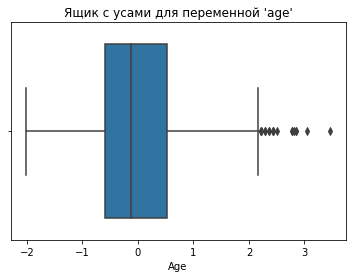

In [91]:
sns.boxplot(data=X_normalized, x='Age')
plt.title("Ящик с усами для переменной 'age'")
plt.show()
#На диаграмме некоторые точки отмечаются как выбросы, хотя по сути эти возраста просто редко встречаются в данных
#К тому же врятли эти возраста были сгенерированы на этапе заполнения пропусков, поскольку на гистограммах распределения в самом начале эти возраста есть

In [99]:
q1 = X_normalized['Age'].quantile(0.25)
q2 = X_normalized['Age'].quantile(0.50) 
q3 = X_normalized['Age'].quantile(0.75)

print("1-й квартиль (25%):", q1)
print("Медиана (50%):", q2)
print("3-й квартиль (75%):", q3)

1-й квартиль (25%): -0.5992646178518193
Медиана (50%): -0.11704877767623337
3-й квартиль (75%): 0.5236094099856166


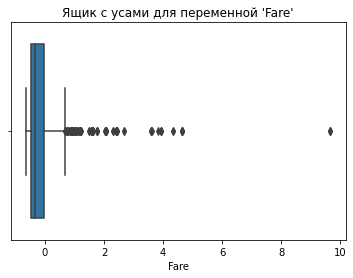

In [98]:
sns.boxplot(data=X_normalized, x='Fare')
plt.title("Ящик с усами для переменной 'Fare'")
plt.show()
#Аналогично, врятли эти редкие значения представляют собой выбросы

In [100]:
q1 = X_normalized['Fare'].quantile(0.25)
q2 = X_normalized['Fare'].quantile(0.50) 
q3 = X_normalized['Fare'].quantile(0.75)

print("1-й квартиль (25%):", q1)
print("Медиана (50%):", q2)
print("3-й квартиль (75%):", q3)

1-й квартиль (25%): -0.489148224018172
Медиана (50%): -0.3573908580066088
3-й квартиль (75%): -0.0242463507548404


In [93]:
file_path = 'DailyDelhiClimateTrain.csv'  #https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
df = pd.read_csv(file_path)
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


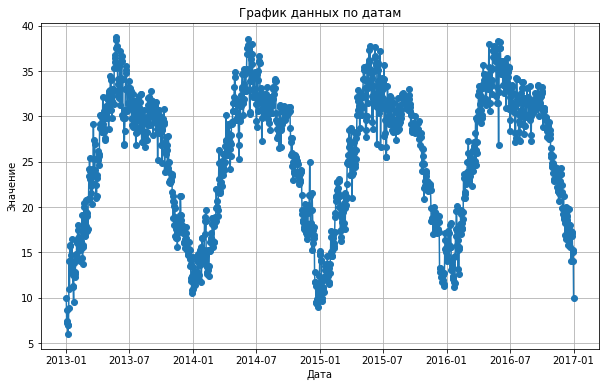

In [94]:

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['meantemp'], marker='o', linestyle='-')
plt.title('График данных по датам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()
#Явно прослеживается сезонность средней температуры

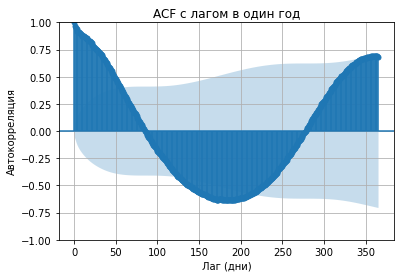

In [97]:
from statsmodels.graphics.tsaplots import plot_acf
lag = 365
plot_acf(df['meantemp'], lags=lag, title='ACF с лагом в один год')
plt.xlabel('Лаг (дни)')
plt.ylabel('Автокорреляция')
plt.grid(True)
plt.show()
#Видно, что текущая температура скореллирована примерно на 70% с температурой в тот же день год назад. Это говорит о наличии сезонности

In [101]:
file_path = 'POP.csv'  #https://www.kaggle.com/datasets/census/population-time-series-data
df = pd.read_csv(file_path)
df.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


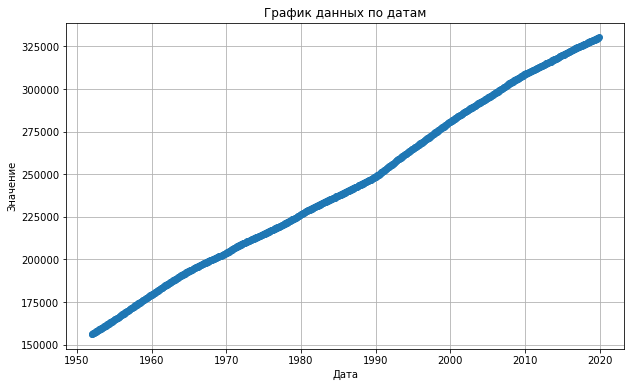

In [102]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], marker='o', linestyle='-')
plt.title('График данных по датам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

In [104]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['value'])

print('ADF Statistic:', result[0])
print('p-value:', result[1]) # Больше уровня значимости -> ряд нестационарный
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -0.6653174110243019
p-value: 0.8555297778919826
Critical Values:
1%: -3.4385711275998583
5%: -2.8651686574447375
10%: -2.568702230639255
